In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
data = pd.read_excel("Downloads/Total_daily_traffic_volume_2G_3G_4G.xlsx")

In [4]:
data.index = data.iloc[:,0]

In [5]:
data.drop(columns=["Unnamed: 0"], inplace=True)

In [6]:
data = data.T

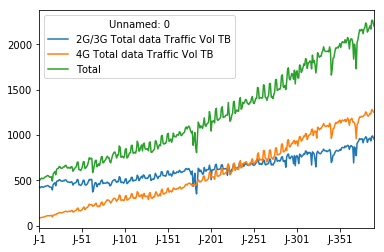

In [7]:
data.plot();

In [8]:
traffic_4G = data.iloc[:,1]

In [9]:
traffic_4G.values.shape

(391,)

### Préparation des données:

- Attention, dans une série temporelle on n'effectue pas un échantillonnage aléatoire.

- A cet égard, on va diviser nos données en deux lots: 
 ***un lot d'entraînement et un lot pour le test***

- Nous avons 391 mesures (jour): 294 jours pour entraîner le modèle et 97 jours le test.

In [10]:
train = traffic_4G.values[:294]

test = traffic_4G.values[294:]

In [11]:
print(train.shape)
print(test.shape)

(294,)
(97,)


In [34]:
# On l'utilisera après
temps = list(range(391))

In [12]:
# avec un modèle linéaire
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
time1 = np.array(list(range(train.shape[0])))
model1.fit(time1.reshape(-1,1), train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
time = np.array(list(range(traffic_4G.values.shape[0])))

In [14]:
pente = model1.coef_

In [15]:
ordo = model1.intercept_

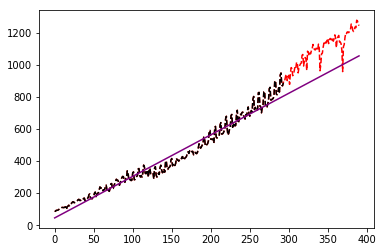

In [16]:
plt.plot(traffic_4G.values,"r--");
plt.plot(train,"k--");
plt.plot(  pente * time + ordo, "purple" );

In [17]:
# Evaluation du modèle

model1.score(time1.reshape(-1,1), train)

0.9638196684193369

In [18]:
model1.score(time[294:].reshape(-1,1) , test)

-1.7752405624444512

### Utilisation d'un algorithme issu de deep learning:

- Architecture RNN (Long Short Term Memory)

In [19]:
# Rescaling between 0 and 1
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [20]:
data_scaled = mms.fit_transform(traffic_4G.values.reshape(-1,1))

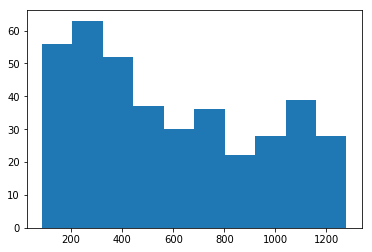

In [21]:
plt.hist(traffic_4G);

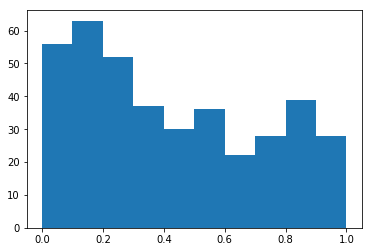

In [22]:
plt.hist(data_scaled);

In [23]:
train = data_scaled[:294,]
 
test = data_scaled[294:,]

In [24]:
print(train.shape)
print(test.shape)

(294, 1)
(97, 1)


In [25]:
# Creating a data structure with 10 days and 1 day output
X_train = []
y_train = []
for i in range(10, 294):
    X_train.append(train[i-10:i, 0])
    y_train.append(train[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [26]:
X_train.shape

(284, 10, 1)

In [27]:
# Importing the Keras libraries and packages
from keras.models import Sequential

Using TensorFlow backend.
/home/ahmed/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ahmed/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ahmed/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ahmed/anaconda3/lib/python3.6/site-packages/tensorflo

In [28]:
from keras.layers import Dense

In [29]:
from keras.layers import LSTM

In [30]:
from keras.layers import Dropout

In [31]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.1))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.1))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.1))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.1))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
284/284 [==============================] - 8s 29ms/step - loss: 0.0694
Epoch 2/100
284/284 [==============================] - 1s 3ms/step - loss: 0.0195
Epoch 3/100
284/284 [==============================] - 1s 2ms/step - loss: 0.0113
Epoch 4/100
284/284 [==============================] - 1s 2ms/step - loss: 0.0041
Epoch 5/100
284/284 [==============================] - 1s 2ms/step - loss: 0.0020
Epoch 6/100
284/284 [==============================] - 1s 2ms/step - loss: 0.0017
Epoch 7/100
284/284 [==============================] - 1s 3ms/step - loss: 0.0013
Epoch 8/100
284/284 [==============================] - 1s 4ms/step - loss: 0.0015
Epoch 9/100
284/284 [==============================] - 1s 3ms/step - loss: 0.0014
Epoch 10/100
284/284 [==============================] - 1s 2ms/step - loss: 0.0013
Epoch 11/100
284/284 [==============================] - 1s 2ms/step - loss: 0.0015
Epoch 12/100
284/284 [==============================] - 1s 4ms/step - loss: 0.0011
Epoch 13/100

In [32]:
X_test = []
for i in range(10, 97):
    X_test.append(test[i-10:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_values = regressor.predict(X_test)

predicted_values = mms.inverse_transform(predicted_values)

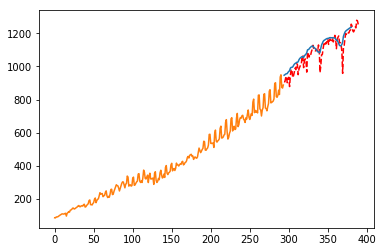

In [43]:
plt.plot(temps[294:],mms.inverse_transform(test),"r--");
plt.plot(temps[294:-10],predicted_values);
plt.plot(temps[:294],mms.inverse_transform(train))

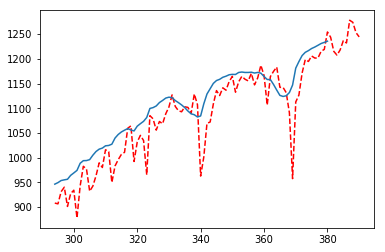

In [44]:
plt.plot(temps[294:],mms.inverse_transform(test),"r--");
plt.plot(temps[294:-10],predicted_values);